## Sephora Products and Skincare Reviews using NLP

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

#### Data Preprocessing

In [3]:
# load the data
products = pd.read_csv('../Dataset/product_info.csv')

In [4]:
products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [9]:
products.shape

(8494, 27)

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

Columns that can help us deciding a better review sentiment analysis:
- product_id
- product_name
- loves_count 
- ratings
- reviews (I guess no. of reviews)


In [10]:
reviews_0_250 = pd.read_csv('../Dataset/reviews_0_250.csv')

/var/folders/zv/x2lv03fs46n15fxz2b08zwx00000gn/T/ipykernel_24495/2594515106.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_0_250 = pd.read_csv('../Dataset/reviews_0_250.csv')


In [12]:
reviews_0_250.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [13]:
reviews_0_250.shape

(602130, 19)

In [11]:
# load all the data
reviews_250_500 = pd.read_csv('../Dataset/reviews_250_500.csv')
reviews_500_750 = pd.read_csv('../Dataset/reviews_500_750.csv')
reviews_750_1000 = pd.read_csv('../Dataset/reviews_750_1000.csv')
reviews_1000_1500 = pd.read_csv('../Dataset/reviews_1000_1500.csv')
reviews_1500_end = pd.read_csv('../Dataset/reviews_1500_end.csv')

/var/folders/zv/x2lv03fs46n15fxz2b08zwx00000gn/T/ipykernel_24495/1117889482.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_1000_1500 = pd.read_csv('../Dataset/reviews_1000_1500.csv')


In [15]:
# shapes of all dataframes
print(reviews_250_500.shape)
print(reviews_500_750.shape)
print(reviews_750_1000.shape)
print(reviews_1000_1500.shape)
print(reviews_1500_end.shape)

(0, 1)
(0, 1)
(0, 1)
(75217, 19)
(0, 1)


In [16]:
reviews_250_500.head()

,Unnamed: 0


All the dataframes except reviews_1000_1500 are empty so discarding them!

In [17]:
reviews_1000_1500.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,8554483509,2,0.0,NaN,0,0,0,2023-03-21,This was gifted by Supergoop! in exchange for ...,Nice packaging but easy to overuse,light,brown,combination,NaN,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
1,1,24710523057,2,0.0,1.000000,2,0,2,2023-03-07,I didn’t like it; too much product comes out w...,Packaging is not suits le,NaN,brown,combination,NaN,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
2,2,8429283179,5,1.0,0.941176,34,2,32,2023-03-01,Y’all….I’m begging for everyone to read instru...,PLS READ THIS LOL,light,green,normal,brown,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
3,3,8105185455,1,0.0,0.000000,5,5,0,2023-02-27,I have not figured out how to use this product...,At a loss,tan,brown,combination,black,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
4,4,1515931062,1,0.0,0.000000,7,7,0,2023-02-27,I’m at a loss as to how to use this thing!!! C...,NOT for me!!,fair,blue,combination,blonde,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0


In [12]:
# merging these two useful dataframes
reviews = pd.concat([reviews_0_250, reviews_1000_1500], axis=0)

In [13]:
reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


<AxesSubplot: xlabel='rating', ylabel='count'>

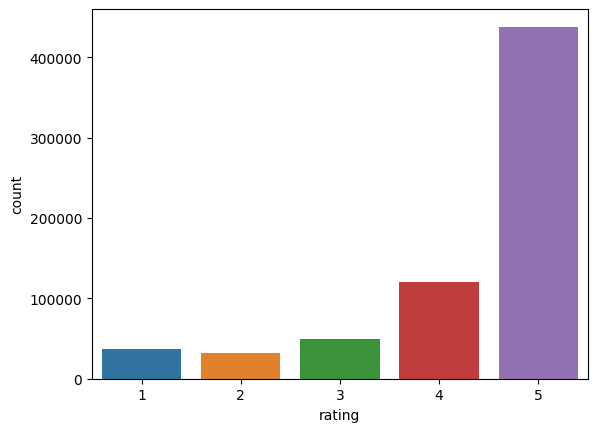

In [16]:
# bar plot of ratings
sns.countplot(x='rating', data=reviews)


<AxesSubplot: >

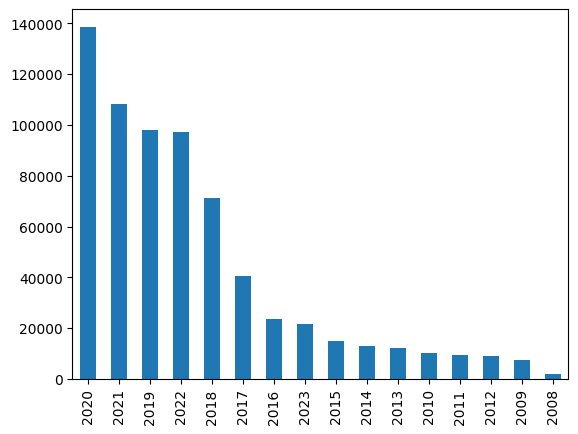

In [23]:
# bar plot of reviews by yearwise
reviews['submission_time'].apply(lambda x: x.split('-')[0]).value_counts().plot(kind='bar')


<AxesSubplot: xlabel='is_recommended', ylabel='count'>

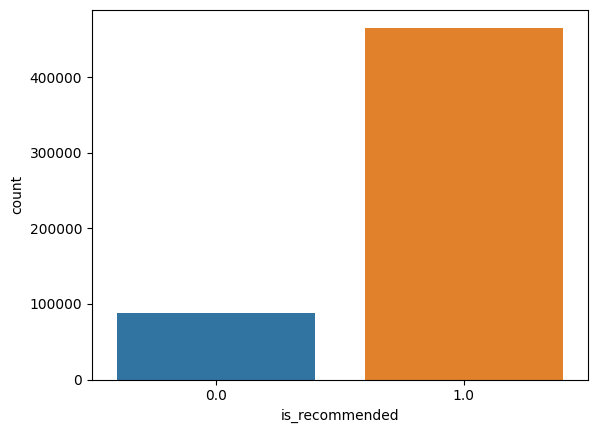

In [24]:
# count plot of reviews by is_recommended
sns.countplot(x='is_recommended', data=reviews)

In [68]:
# dropping the unnnamed column
reviews.drop('Unnamed: 0', axis=1, inplace=True)

In [69]:
reviews.shape

(677347, 18)

In [70]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677347 entries, 0 to 75216
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   author_id                 677347 non-null  object 
 1   rating                    677347 non-null  int64  
 2   is_recommended            553764 non-null  float64
 3   helpfulness               311441 non-null  float64
 4   total_feedback_count      677347 non-null  int64  
 5   total_neg_feedback_count  677347 non-null  int64  
 6   total_pos_feedback_count  677347 non-null  int64  
 7   submission_time           677347 non-null  object 
 8   review_text               676292 non-null  object 
 9   review_title              487925 non-null  object 
 10  skin_tone                 561512 non-null  object 
 11  eye_color                 529314 non-null  object 
 12  skin_type                 597596 non-null  object 
 13  hair_color                523000 non-null  ob

Columns that can help us deciding a better review sentiment analysis:
- author_id
- rating
- is_recommended 
- ratings
- total_pos_feedback_count
- total_neg_feedback_count
- review_text (Not considering review title as sometimes they are misleading)
- product_id
- product_name

In [71]:
reviews.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [72]:
reviews = reviews[['author_id', 'rating', 'is_recommended', 'total_neg_feedback_count', 'total_pos_feedback_count', 'review_text', 'product_id', 'product_name']]

In [73]:
reviews.shape

(677347, 8)

In [74]:
reviews.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,product_id,product_name
0,1741593524,5,1.0,0,2,I use this with the Nudestix “Citrus Clean Bal...,P504322,Gentle Hydra-Gel Face Cleanser
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...
2,5061282401,5,1.0,0,0,My review title says it all! I get so excited ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...
3,6083038851,5,1.0,0,0,I’ve always loved this formula for a long time...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...
4,47056667835,5,1.0,0,0,"If you have dry cracked lips, this is a must h...",P420652,Lip Sleeping Mask Intense Hydration with Vitam...


In [5]:
# selecting the useful columns
products = products[['product_id', 'product_name', 'loves_count', 'rating', 'reviews']]

In [6]:
products.head()

,product_id,product_name,loves_count,rating,reviews
0,P473671,Fragrance Discovery Set,6320,3.6364,11.0
1,P473668,La Habana Eau de Parfum,3827,4.1538,13.0
2,P473662,Rainbow Bar Eau de Parfum,3253,4.2500,16.0
3,P473660,Kasbah Eau de Parfum,3018,4.4762,21.0
4,P473658,Purple Haze Eau de Parfum,2691,3.2308,13.0


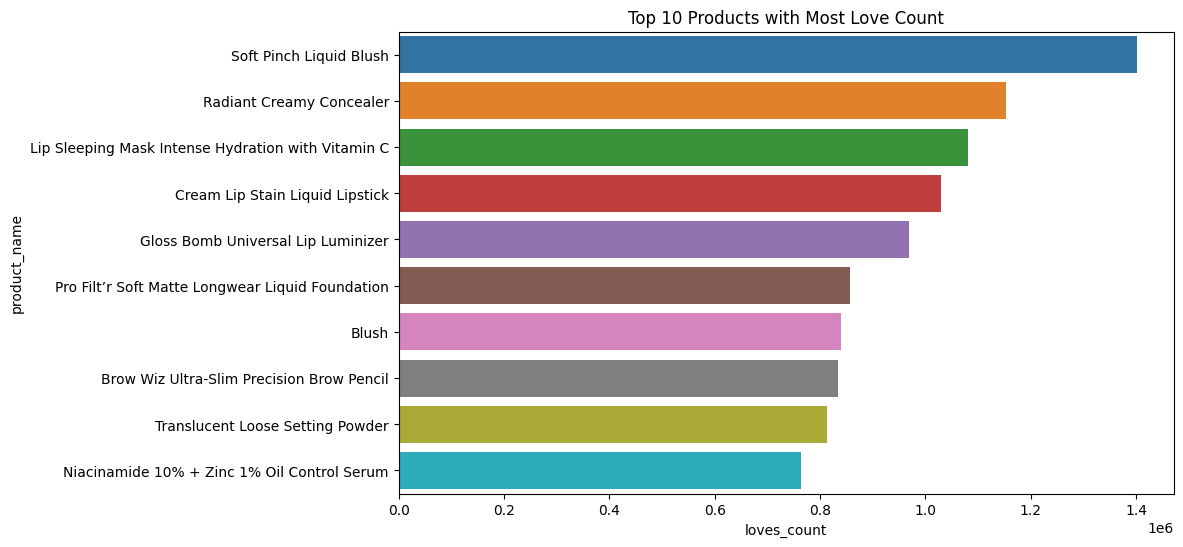

In [8]:
# bar plot of top 10 products with most love_count
plt.figure(figsize=(10, 6))
sns.barplot(x='loves_count', y='product_name', data=products.sort_values('loves_count', ascending=False).head(10))
plt.title('Top 10 Products with Most Love Count')
plt.show()


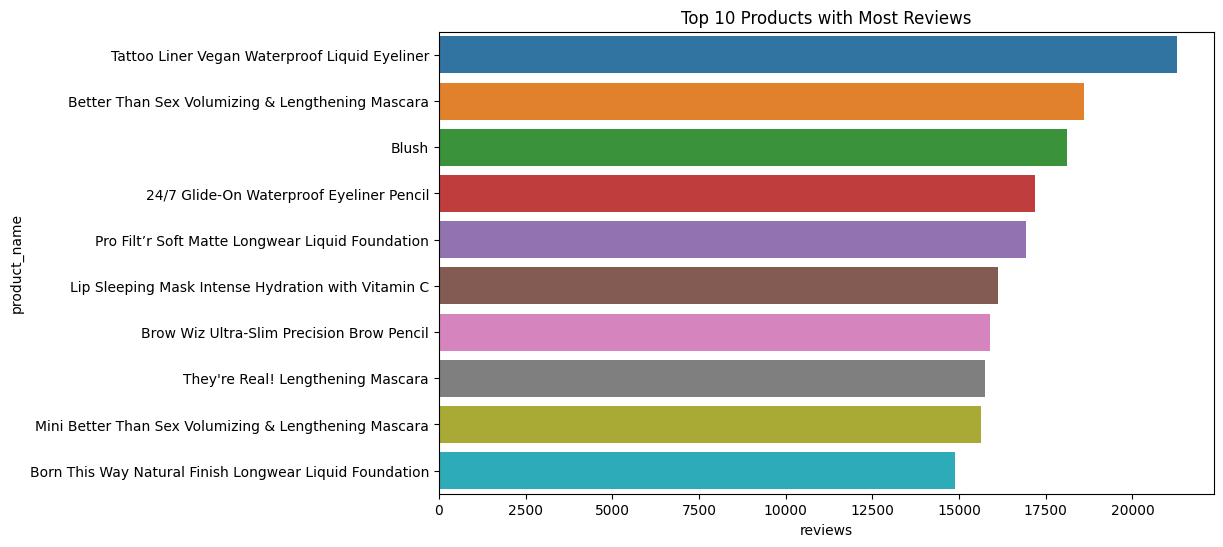

In [9]:
# top 10 products with most reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews', y='product_name', data=products.sort_values('reviews', ascending=False).head(10))
plt.title('Top 10 Products with Most Reviews')
plt.show()

In [77]:
# any null values?
products.isnull().sum()

product_id      0
product_name    0
loves_count     0
rating          0
reviews         0
dtype: int64

In [78]:
# dropping the null values
products.dropna(inplace=True)
products.isnull().sum()

product_id      0
product_name    0
loves_count     0
rating          0
reviews         0
dtype: int64

In [79]:
products.shape

(8216, 5)

In [80]:
# unique products
products['product_id'].nunique()

8216

In [81]:
reviews['product_id'].nunique()

505

In [82]:
reviews['product_name'].nunique()

504

In [83]:
products['product_name'][340]

'Laminated Look Brow Kit'

In [84]:
products['product_id'][340]

'P504629'

In [85]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677347 entries, 0 to 75216
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   author_id                 677347 non-null  object 
 1   rating                    677347 non-null  int64  
 2   is_recommended            553764 non-null  float64
 3   total_neg_feedback_count  677347 non-null  int64  
 4   total_pos_feedback_count  677347 non-null  int64  
 5   review_text               676292 non-null  object 
 6   product_id                677346 non-null  object 
 7   product_name              677346 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 46.5+ MB


#### VADER Approach

In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [87]:
# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [88]:
sia.polarity_scores('This product is very good')

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

Text cleaning

In [89]:
def clean_text(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    clean_text = re.sub(r'\s+', ' ', clean_text)
    return clean_text

In [90]:
# convert the review_text column to string
reviews['review_text'] = reviews['review_text'].astype(str)

In [91]:
reviews['review_text'] = reviews['review_text'].apply(clean_text)

In [92]:
reviews.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,product_id,product_name
0,1741593524,5,1.0,0,2,I use this with the Nudestix Citrus Clean Balm...,P504322,Gentle Hydra-Gel Face Cleanser
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...
2,5061282401,5,1.0,0,0,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...
3,6083038851,5,1.0,0,0,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...
4,47056667835,5,1.0,0,0,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...


In [93]:
# run the polarity_scores() method on each tweet and append the results to a new column in the dataframe
reviews['vader_score'] = reviews['review_text'].apply(lambda x: sia.polarity_scores(x))

In [94]:
reviews.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,product_id,product_name,vader_score
0,1741593524,5,1.0,0,2,I use this with the Nudestix Citrus Clean Balm...,P504322,Gentle Hydra-Gel Face Cleanser,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp..."
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,"{'neg': 0.079, 'neu': 0.825, 'pos': 0.096, 'co..."
2,5061282401,5,1.0,0,0,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,"{'neg': 0.047, 'neu': 0.911, 'pos': 0.043, 'co..."
3,6083038851,5,1.0,0,0,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp..."
4,47056667835,5,1.0,0,0,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,"{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou..."


In [95]:
# separate the polarity score into four separate columns
reviews = pd.concat([reviews.drop(['vader_score'], axis=1), reviews['vader_score'].apply(pd.Series)], axis=1)

In [96]:
reviews.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,product_id,product_name,neg,neu,pos,compound
0,1741593524,5,1.0,0,2,I use this with the Nudestix Citrus Clean Balm...,P504322,Gentle Hydra-Gel Face Cleanser,0.000,0.788,0.212,0.9455
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.079,0.825,0.096,0.1280
2,5061282401,5,1.0,0,0,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.047,0.911,0.043,-0.0495
3,6083038851,5,1.0,0,0,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.000,0.707,0.293,0.9460
4,47056667835,5,1.0,0,0,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.000,0.940,0.060,0.3291


In [99]:
# create a new column for calculation total_pos_feedback_count/(total_pos_feedback_count + total_neg_feedback_count) and if total_pos_feedback_count = 0, then 0
reviews['pos_feedback'] = reviews['total_pos_feedback_count']/(reviews['total_pos_feedback_count'] + reviews['total_neg_feedback_count'])
reviews['pos_feedback'].fillna(0, inplace=True)

In [100]:
reviews.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,product_id,product_name,neg,neu,pos,compound,feedback_score,pos_feedback
0,1741593524,5,1.0,0,2,I use this with the Nudestix Citrus Clean Balm...,P504322,Gentle Hydra-Gel Face Cleanser,0.000,0.788,0.212,0.9455,1.0,1.0
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.079,0.825,0.096,0.1280,NaN,0.0
2,5061282401,5,1.0,0,0,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.047,0.911,0.043,-0.0495,NaN,0.0
3,6083038851,5,1.0,0,0,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.000,0.707,0.293,0.9460,NaN,0.0
4,47056667835,5,1.0,0,0,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.000,0.940,0.060,0.3291,NaN,0.0


In [101]:
# top 10 products with highest positive feedback
reviews.groupby('product_name')['pos_feedback'].mean().sort_values(ascending=False).head(10)

product_name
Gentle Hydra-Gel Face Cleanser                         1.000000
Amino Acids + B5                                       0.832020
"Buffet" + Copper Peptides 1%                          0.804914
Marine Hyaluronics                                     0.804374
Luxury Beauty Serum Calming Treatment                  0.792754
"B" Oil                                                0.791432
Metal Facial Razor                                     0.790518
Green Defense Daily Mineral Sunscreen SPF 30           0.783985
DERMAPORE Ultrasonic Pore Extractor & Serum Infuser    0.777318
Argireline Solution 10%                                0.776551
Name: pos_feedback, dtype: float64

In [102]:
# unique values in pos_feedback column
reviews['pos_feedback'].nunique()

2587

In [103]:
# min and max values in pos_feedback column
print(reviews['pos_feedback'].min())
print(reviews['pos_feedback'].max())

0.0
1.0


In [104]:
# drop total_pos_feedback_count and total_neg_feedback_count, neg neu pos feedback_score	columns
reviews.drop(['total_pos_feedback_count', 'total_neg_feedback_count', 'neg', 'neu', 'pos'], axis=1, inplace=True)

In [105]:
combined_score = (reviews['rating']*0.2) + (reviews['pos_feedback']*0.4) + (reviews['compound']*0.4)

# create a new column for combined_score
reviews['combined_score'] = combined_score

In [106]:
reviews.head()

,author_id,rating,is_recommended,review_text,product_id,product_name,compound,feedback_score,pos_feedback,combined_score
0,1741593524,5,1.0,I use this with the Nudestix Citrus Clean Balm...,P504322,Gentle Hydra-Gel Face Cleanser,0.9455,1.0,1.0,1.77820
1,31423088263,1,0.0,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.1280,NaN,0.0,0.25120
2,5061282401,5,1.0,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,-0.0495,NaN,0.0,0.98020
3,6083038851,5,1.0,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.9460,NaN,0.0,1.37840
4,47056667835,5,1.0,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.3291,NaN,0.0,1.13164


In [107]:
# drop is_recommended column and feedback_score column
reviews.drop(['is_recommended', 'feedback_score'], axis=1, inplace=True)

In [108]:
# normalize the combined_score column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

reviews['combined_score'] = scaler.fit_transform(reviews[['combined_score']])
reviews.head()

,author_id,rating,review_text,product_id,product_name,compound,pos_feedback,combined_score
0,1741593524,5,I use this with the Nudestix Citrus Clean Balm...,P504322,Gentle Hydra-Gel Face Cleanser,0.9455,1.0,0.989250
1,31423088263,1,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.1280,0.0,0.223637
2,5061282401,5,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,-0.0495,0.0,0.589146
3,6083038851,5,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.9460,0.0,0.788797
4,47056667835,5,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.3291,0.0,0.665076


The MinMaxScaler is a data preprocessing technique used to transform features by scaling them to a specific range. It operates on each feature independently and scales the values to a specified minimum and maximum range, often between 0 and 1.

The MinMaxScaler formula for feature scaling is as follows:

X_scaled = (X - X_min) / (X_max - X_min)

In [109]:
# top 10 products with highest combined_score
reviews.groupby('product_name')['combined_score'].mean().sort_values(ascending=False).head(10)

product_name
Gentle Hydra-Gel Face Cleanser                                             0.989250
Wild Nettle & Niacinamide Instant Firming Serum                            0.849748
Retinol Face Stick                                                         0.849489
Wild Huckleberry 8-Acid Polishing Peel Mask                                0.848782
Fat Water Hydrating Milky Toner Essence with Hyaluronic Acid + Tamarind    0.846253
Resveratrol Lift Instant Firming Retinol Alternative Serum                 0.840608
Blemish Balm Cleanser                                                      0.838624
Metal Facial Razor                                                         0.835318
Instant Pore Perfector                                                     0.833002
Luxury Beauty Serum Calming Treatment                                      0.831950
Name: combined_score, dtype: float64

In [110]:
# list all entries for the product_id = P420652
reviews[reviews['product_id'] == 'P420652']

,author_id,rating,review_text,product_id,product_name,compound,pos_feedback,combined_score
1,31423088263,1,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.1280,0.000000,0.223637
2,5061282401,5,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,-0.0495,0.000000,0.589146
3,6083038851,5,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.9460,0.000000,0.788797
4,47056667835,5,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.3291,0.000000,0.665076
5,42802569154,4,The scent isnt my favourite but it works great...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.9382,1.000000,0.887510
...,...,...,...,...,...,...,...,...
16134,8580909247,5,my lips were always dried during the seasons a...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.7906,0.877551,0.933627
16135,8977551875,5,I have the driest lips in the world and man oh...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.0129,0.878788,0.777905
16136,7465712034,5,I swear by this for my dry easily chapped lips...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.8442,0.785714,0.925959
16137,2628835241,5,I have been using this mask for a while now I ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.9519,0.860000,0.962456


In [111]:
# count all the reviews for each unique product_id
reviews['product_id'].value_counts()

P420652    16138
P7880       8736
P218700     7763
P248407     7547
P269122     7414
           ...  
P405944      227
P443837      227
P500039      226
P423135      197
P504322        1
Name: product_id, Length: 505, dtype: int64

In [115]:
# new dataframe with single entry for each unique product_id, product_name and their mean combined_score
combined_reviews = reviews.groupby(['product_id', 'product_name'])['combined_score'].mean().reset_index()

In [116]:
combined_reviews.head()

,product_id,product_name,combined_score
0,P107306,Renewing Eye Cream,0.737803
1,P114902,Goodbye Acne Max Complexion Correction Pads,0.731660
2,P12045,Grape Water Moisturizing Face Mist,0.749453
3,P122718,Exfoliating Face Scrub,0.740201
4,P122727,Repairwear Anti-Gravity Eye Cream,0.741544


In [117]:
combined_reviews.shape

(505, 3)

In [118]:
# top 10 products with highest combined_score
combined_reviews.sort_values(by='combined_score', ascending=False).head(10)

,product_id,product_name,combined_score
491,P504322,Gentle Hydra-Gel Face Cleanser,0.989250
377,P472302,Wild Nettle & Niacinamide Instant Firming Serum,0.849748
413,P479340,Retinol Face Stick,0.849489
332,P465741,Wild Huckleberry 8-Acid Polishing Peel Mask,0.848782
465,P500894,Fat Water Hydrating Milky Toner Essence with H...,0.846253
333,P466114,Resveratrol Lift Instant Firming Retinol Alter...,0.840608
361,P469530,Blemish Balm Cleanser,0.838624
298,P458724,Metal Facial Razor,0.835318
475,P501781,Instant Pore Perfector,0.833002
227,P444222,Luxury Beauty Serum Calming Treatment,0.831950


In [123]:
!pip3 install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp310-cp310-macosx_11_0_arm64.whl size=152485 sha256=44015ff8fdb3c4652e67060f33a43dee38dbfb65ad47906bfab01ff9a65364af
  Stored in directory: /Users/omachrekar/Library/Caches/pip/wheels/56/72/cc/86d8dbd1e3a8ef5470177cf6a4d25ec3cbebac55402e0ff4f0
Successfully built wordcloud


In [124]:
from wordcloud import WordCloud

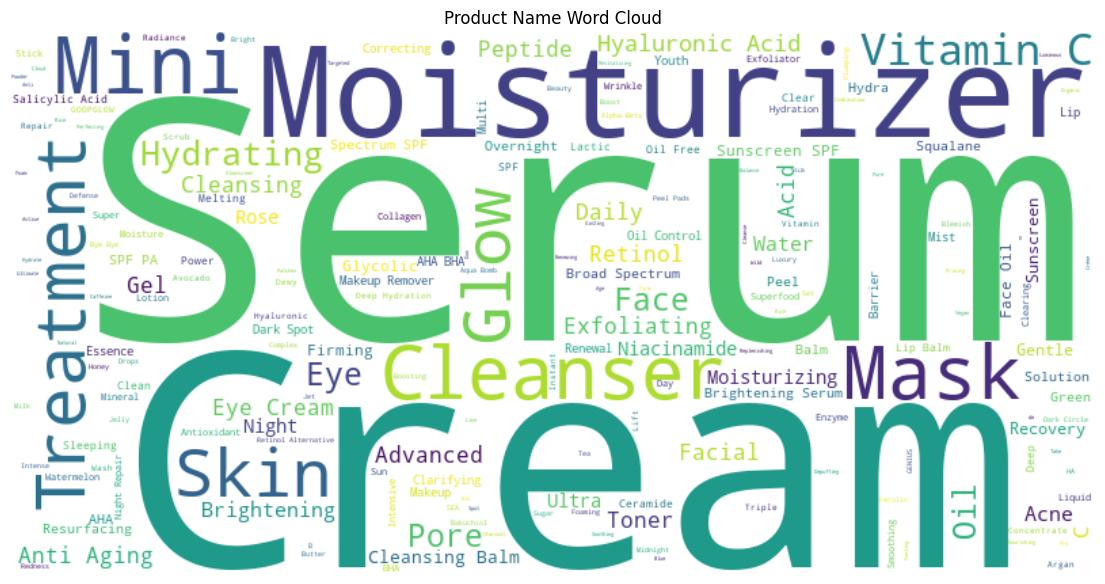

In [126]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(' '.join(combined_reviews['product_name']))

# Plot the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Product Name Word Cloud')
plt.show()

#### RoBERTa

RoBERTa (Robustly Optimized BERT Approach) is another state-of-the-art language model based on the BERT architecture. It is developed by Facebook AI and builds upon BERT's pre-training methodology with some modifications to improve performance. RoBERTa removes the next sentence prediction task from pre-training and trains on larger batch sizes and more training data. It also uses dynamic masking during pre-training, which helps the model generalize better. RoBERTa achieves state-of-the-art results on various natural language understanding benchmarks and tasks. Similar to BERT, RoBERTa's contextual embeddings can be fine-tuned for specific downstream tasks, making it a powerful tool for tasks like sentiment analysis, text classification, and machine translation.

In [127]:
reviews.head()

,author_id,rating,review_text,product_id,product_name,compound,pos_feedback,combined_score
0,1741593524,5,I use this with the Nudestix Citrus Clean Balm...,P504322,Gentle Hydra-Gel Face Cleanser,0.9455,1.0,0.989250
1,31423088263,1,I bought this lip mask after reading the revie...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.1280,0.0,0.223637
2,5061282401,5,My review title says it all I get so excited t...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,-0.0495,0.0,0.589146
3,6083038851,5,Ive always loved this formula for a long time ...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.9460,0.0,0.788797
4,47056667835,5,If you have dry cracked lips this is a must ha...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,0.3291,0.0,0.665076


In [128]:
# drop compund and combined_score columns
reviews.drop(['compound', 'combined_score'], axis=1, inplace=True)

In [133]:
# copy the reviews dataframe
reviews_copy = reviews.copy()

In [129]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [130]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [131]:
# Run for Roberta 
example = "This shampoo is very good. I love it."

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0019639204, 'roberta_neu': 0.006252544, 'roberta_pos': 0.9917835}


In [132]:
# apply the model on each tweet and append the results to a new column in the dataframe and also show the progress bar
def get_sentiment(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [139]:
import math

In [140]:
def get_sentiment_for_RoBERTa(text):
    max_sequence_length = 512  # Maximum sequence length allowed by the RoBERTa model
    encoded_chunks = []
    num_chunks = int(math.ceil(len(text) / max_sequence_length))

    for i in range(num_chunks):
        start = i * max_sequence_length
        end = (i + 1) * max_sequence_length
        chunk = text[start:end]

        encoded_text = tokenizer(chunk, return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        scores_dict = {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
        encoded_chunks.append(scores_dict)

    return encoded_chunks

In [143]:
# select 75000 random reviews
reviews_75000 = reviews.sample(n=75000, random_state=42)
reviews_75000.head()

,author_id,rating,review_text,product_id,product_name,pos_feedback
479281,6594449766,3,My favorite thing about this product was that ...,P439058,Violet-C Brightening Serum 20% Vitamin C + 10%...,0.000000
419279,1238875202,4,The packaging is awkward but it is very moistu...,P403818,Lippe Balm,0.000000
447463,5916628538,5,I had myself color matched in store and the as...,P426340,The Rice Polish Foaming Enzyme Powder,0.888889
59574,2841543991,5,I love this firming cream I love this brands p...,P483708,Mini Essential Comfort Firming Cream,0.000000
337182,2323316305,5,Received this in the birthday gift Smells like...,P12336,Rose Face Mask,0.000000


RoBERTa is very resource extensive model, running it for approx 1.7 lakhs of rows took me 2.15 hours so here there are 6.7 lakhs of such row. Therefore selecting random 75000 rows. If you want to apply RoBERTa on whole dataset do not execute above cell.

In [144]:
# apply the get_sentiment() function on each tweet and append the results to a new column in the dataframe
reviews_75000['roberta_scores'] = reviews_75000['review_text'].apply(get_sentiment_for_RoBERTa)

Still it took 83 minutes to perform sentiment analysis on 75000 rows

In [146]:
reviews_75000.head()

,author_id,rating,review_text,product_id,product_name,pos_feedback,roberta_scores
479281,6594449766,3,My favorite thing about this product was that ...,P439058,Violet-C Brightening Serum 20% Vitamin C + 10%...,0.000000,"[{'roberta_neg': 0.0029150052, 'roberta_neu': ..."
419279,1238875202,4,The packaging is awkward but it is very moistu...,P403818,Lippe Balm,0.000000,"[{'roberta_neg': 0.04708248, 'roberta_neu': 0...."
447463,5916628538,5,I had myself color matched in store and the as...,P426340,The Rice Polish Foaming Enzyme Powder,0.888889,"[{'roberta_neg': 0.381373, 'roberta_neu': 0.42..."
59574,2841543991,5,I love this firming cream I love this brands p...,P483708,Mini Essential Comfort Firming Cream,0.000000,"[{'roberta_neg': 0.004896268, 'roberta_neu': 0..."
337182,2323316305,5,Received this in the birthday gift Smells like...,P12336,Rose Face Mask,0.000000,"[{'roberta_neg': 0.022328489, 'roberta_neu': 0..."


In [147]:
# separate the roberta_scores column into three separate columns
reviews_75000 = pd.concat([reviews_75000.drop(['roberta_scores'], axis=1), reviews_75000['roberta_scores'].apply(pd.Series)], axis=1)

In [150]:
reviews_75000_copy = reviews_75000.copy()

In [153]:
reviews_75000.head()

,author_id,rating,review_text,product_id,product_name,pos_feedback,roberta_scores
479281,6594449766,3,My favorite thing about this product was that ...,P439058,Violet-C Brightening Serum 20% Vitamin C + 10%...,0.000000,"{'roberta_neg': 0.0029150052, 'roberta_neu': 0..."
419279,1238875202,4,The packaging is awkward but it is very moistu...,P403818,Lippe Balm,0.000000,"{'roberta_neg': 0.04708248, 'roberta_neu': 0.2..."
447463,5916628538,5,I had myself color matched in store and the as...,P426340,The Rice Polish Foaming Enzyme Powder,0.888889,"{'roberta_neg': 0.381373, 'roberta_neu': 0.426..."
59574,2841543991,5,I love this firming cream I love this brands p...,P483708,Mini Essential Comfort Firming Cream,0.000000,"{'roberta_neg': 0.004896268, 'roberta_neu': 0...."
337182,2323316305,5,Received this in the birthday gift Smells like...,P12336,Rose Face Mask,0.000000,"{'roberta_neg': 0.022328489, 'roberta_neu': 0...."


In [154]:
# separate the roberta_scores column into three separate columns called roberta_neg, roberta_neu and roberta_pos
reviews_75000 = pd.concat([reviews_75000.drop(['roberta_scores'], axis=1), reviews_75000['roberta_scores'].apply(pd.Series)], axis=1)

In [155]:
reviews_75000.head()

,author_id,rating,review_text,product_id,product_name,pos_feedback,roberta_neg,roberta_neu,roberta_pos
479281,6594449766,3,My favorite thing about this product was that ...,P439058,Violet-C Brightening Serum 20% Vitamin C + 10%...,0.000000,0.002915,0.009979,0.987106
419279,1238875202,4,The packaging is awkward but it is very moistu...,P403818,Lippe Balm,0.000000,0.047082,0.250732,0.702185
447463,5916628538,5,I had myself color matched in store and the as...,P426340,The Rice Polish Foaming Enzyme Powder,0.888889,0.381373,0.426223,0.192405
59574,2841543991,5,I love this firming cream I love this brands p...,P483708,Mini Essential Comfort Firming Cream,0.000000,0.004896,0.013132,0.981971
337182,2323316305,5,Received this in the birthday gift Smells like...,P12336,Rose Face Mask,0.000000,0.022328,0.140104,0.837568


In [156]:
roberta_combined_score = (reviews_75000['roberta_pos']*0.2) + (reviews_75000['roberta_neu']*0.4) + (reviews_75000['roberta_neg']*0.4)
combined_score = (reviews_75000['rating']*0.2) + (reviews_75000['pos_feedback']*0.4) + (roberta_combined_score*0.4)

# create a new column for combined_score
reviews_75000['combined_score'] = combined_score

In [157]:
reviews_75000.head()

,author_id,rating,review_text,product_id,product_name,pos_feedback,roberta_neg,roberta_neu,roberta_pos,combined_score
479281,6594449766,3,My favorite thing about this product was that ...,P439058,Violet-C Brightening Serum 20% Vitamin C + 10%...,0.000000,0.002915,0.009979,0.987106,0.681032
419279,1238875202,4,The packaging is awkward but it is very moistu...,P403818,Lippe Balm,0.000000,0.047082,0.250732,0.702185,0.903825
447463,5916628538,5,I had myself color matched in store and the as...,P426340,The Rice Polish Foaming Enzyme Powder,0.888889,0.381373,0.426223,0.192405,1.500163
59574,2841543991,5,I love this firming cream I love this brands p...,P483708,Mini Essential Comfort Firming Cream,0.000000,0.004896,0.013132,0.981971,1.081442
337182,2323316305,5,Received this in the birthday gift Smells like...,P12336,Rose Face Mask,0.000000,0.022328,0.140104,0.837568,1.092995


In [159]:
# normalize the combined_score column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

reviews_75000['combined_score'] = scaler.fit_transform(reviews_75000[['combined_score']])
reviews_75000.head()

,author_id,rating,review_text,product_id,product_name,pos_feedback,roberta_neg,roberta_neu,roberta_pos,combined_score
479281,6594449766,3,My favorite thing about this product was that ...,P439058,Violet-C Brightening Serum 20% Vitamin C + 10%...,0.000000,0.002915,0.009979,0.987106,0.312121
419279,1238875202,4,The packaging is awkward but it is very moistu...,P403818,Lippe Balm,0.000000,0.047082,0.250732,0.702185,0.486549
447463,5916628538,5,I had myself color matched in store and the as...,P426340,The Rice Polish Foaming Enzyme Powder,0.888889,0.381373,0.426223,0.192405,0.953427
59574,2841543991,5,I love this firming cream I love this brands p...,P483708,Mini Essential Comfort Firming Cream,0.000000,0.004896,0.013132,0.981971,0.625607
337182,2323316305,5,Received this in the birthday gift Smells like...,P12336,Rose Face Mask,0.000000,0.022328,0.140104,0.837568,0.634651


In [160]:
# keeping only product_id, product_name and combined_score columns
reviews_75000 = reviews_75000[['product_id', 'product_name', 'combined_score']]

In [161]:
reviews_75000.head()

,product_id,product_name,combined_score
479281,P439058,Violet-C Brightening Serum 20% Vitamin C + 10%...,0.312121
419279,P403818,Lippe Balm,0.486549
447463,P426340,The Rice Polish Foaming Enzyme Powder,0.953427
59574,P483708,Mini Essential Comfort Firming Cream,0.625607
337182,P12336,Rose Face Mask,0.634651


In [162]:
# top 10 products with highest combined_score
reviews_75000.groupby('product_name')['combined_score'].mean().sort_values(ascending=False).head(10)

product_name
100% Plant-Derived Hemi-Squalane                   0.829089
Wild Nettle & Niacinamide Instant Firming Serum    0.826322
100% Organic Cold-Pressed Moroccan Argan Oil       0.811298
Metal Facial Razor                                 0.805166
Ultra Repair Oil-Control Moisturizer               0.798424
Mini Fulvic Acid Brightening Cleanser              0.791740
Super Amino Gel Cleanser                           0.791416
Luxury Beauty Serum Calming Treatment              0.790770
Blemish Balm Cleanser                              0.789581
CLINICAL 1% Retinol Treatment                      0.784278
Name: combined_score, dtype: float64

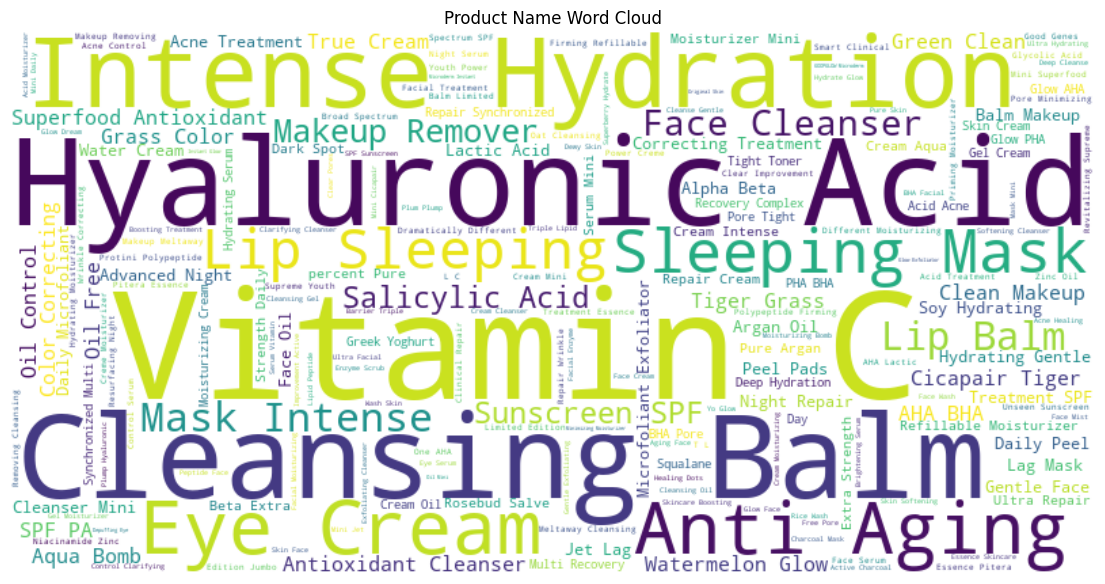

In [163]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(' '.join(reviews_75000['product_name']))

# Plot the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Product Name Word Cloud')
plt.show()

Note: The sentiment analysis performed using pre-traine RoBERTa is only for random 75000 reviews. It is limited because RoBERTa demands more computational resources than others.

#### BERT

BERT stands for Bidirectional Encoder Representation of Transformers

BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art language representation model developed by Google. It utilizes a transformer-based architecture and is pre-trained on large-scale corpora, capturing deep contextual word representations. BERT introduces the concept of masked language modeling and next sentence prediction tasks during pre-training to learn bidirectional contextual embeddings. These embeddings can be fine-tuned for a wide range of downstream natural language processing tasks, such as sentiment analysis, question answering, and named entity recognition. BERT's ability to capture intricate linguistic dependencies and contextual information has led to significant improvements in various language understanding tasks.

Imports:

In [190]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [191]:
reviews_75000_copy.head()

,review_text,roberta_neg,roberta_neu,roberta_pos
479281,My favorite thing about this product was that ...,0.002915,0.009979,0.987106
419279,The packaging is awkward but it is very moistu...,0.047082,0.250732,0.702185
447463,I had myself color matched in store and the as...,0.381373,0.426223,0.192405
59574,I love this firming cream I love this brands p...,0.004896,0.013132,0.981971
337182,Received this in the birthday gift Smells like...,0.022328,0.140104,0.837568


In [192]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # Specify the desired BERT model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [193]:
# Function to get sentiment using BERT-based model
def get_bert_sentiment(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        truncation=True,
        max_length=512,  # Adjust the max_length if necessary
        padding='longest',
        return_tensors='pt'
    )

    inputs = inputs.to('cpu')
    outputs = model(**inputs)
    logits = outputs.logits.detach().cpu().numpy()
    sentiment_score = logits[0][1]  # Assuming binary classification (positive sentiment)
    return sentiment_score

In [194]:
# Apply the get_bert_sentiment() function on each review_text and append the results to a new column in the dataframe
reviews_75000_copy['bert_score'] = reviews_75000_copy['review_text'].apply(get_bert_sentiment)

In [195]:
reviews_75000_copy.head()

,review_text,roberta_neg,roberta_neu,roberta_pos,bert_score
479281,My favorite thing about this product was that ...,0.002915,0.009979,0.987106,-0.021987
419279,The packaging is awkward but it is very moistu...,0.047082,0.250732,0.702185,-0.091043
447463,I had myself color matched in store and the as...,0.381373,0.426223,0.192405,-0.061693
59574,I love this firming cream I love this brands p...,0.004896,0.013132,0.981971,0.014131
337182,Received this in the birthday gift Smells like...,0.022328,0.140104,0.837568,-0.064332


In [200]:
# top 10 bert_score
reviews_75000_copy.groupby('review_text')['bert_score'].mean().sort_values(ascending=False).head(10)

review_text
Life saver Makes my pimple disappear in only one night Love it                                                                                                                                                                                                                                0.108982
My skin feels and looks great My makeup goes on smoother                                                                                                                                                                                                                                      0.105016
Good Genes smoothes and evens out my skin during the day while Luna gives me the healthiest glow overnight Finally upgrading Biggie GG Good Genes                                                                                                                                             0.103372
Light weight cream Evens out skin tone redness Tightens skin                                           